## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [17]:
df = pd.read_csv("./data/QueryResults.csv", sep=",")
print(df)

                     Date         Tag  Posts Count
0     2008-07-01 00:00:00          c#            3
1     2008-08-01 00:00:00    assembly            8
2     2008-08-01 00:00:00  javascript          162
3     2008-08-01 00:00:00           c           85
4     2008-08-01 00:00:00      python          124
...                   ...         ...          ...
1986  2020-07-01 00:00:00           r         5694
1987  2020-07-01 00:00:00          go          743
1988  2020-07-01 00:00:00        ruby          775
1989  2020-07-01 00:00:00        perl          182
1990  2020-07-01 00:00:00       swift         3607

[1991 rows x 3 columns]


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [18]:
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Last 5 Rows ---")
print(df.tail())


--- First 5 Rows ---
                  Date         Tag  Posts Count
0  2008-07-01 00:00:00          c#            3
1  2008-08-01 00:00:00    assembly            8
2  2008-08-01 00:00:00  javascript          162
3  2008-08-01 00:00:00           c           85
4  2008-08-01 00:00:00      python          124

--- Last 5 Rows ---
                     Date    Tag  Posts Count
1986  2020-07-01 00:00:00      r         5694
1987  2020-07-01 00:00:00     go          743
1988  2020-07-01 00:00:00   ruby          775
1989  2020-07-01 00:00:00   perl          182
1990  2020-07-01 00:00:00  swift         3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [19]:
print("\n--- Shape of DataFrame (Rows, Columns) ---")
print(df.shape)


--- Shape of DataFrame (Rows, Columns) ---
(1991, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [20]:
print(df.count())

Date           1991
Tag            1991
Posts Count    1991
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [31]:
print("\n--- Programming Languages Sorted by Most Posts ---")
tag_totals = df.groupby("Tag")["Posts Count"].sum().sort_values(ascending=False)
print(tag_totals)
print("\n--- Language with Highest Total Posts ---")
highest_total_posts = tag_totals.idxmax()
print(highest_total_posts)


--- Programming Languages Sorted by Most Posts ---
Tag
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: Posts Count, dtype: int64

--- Language with Highest Total Posts ---
javascript


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [32]:
print("\n--- Programming Languages Sorted by Least Months ---")
df['Date'] = pd.to_datetime(df['Date'])
months_per_tag = (df.groupby(['Tag', df['Date'].dt.to_period('M')]).size().groupby(level=0).count()).sort_values()
print(months_per_tag)
print("\n--- Language with the Least Months ---")
min_months_tag = months_per_tag.idxmin()
print(min_months_tag)


--- Programming Languages Sorted by Least Months ---
Tag
go            129
swift         135
r             142
assembly      144
c             144
c++           144
delphi        144
java          144
javascript    144
perl          144
php           144
python        144
ruby          144
c#            145
dtype: int64

--- Language with the Least Months ---
go


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
df['Date'] = df['Date'].dt.date

In [36]:
print(df)

            Date         Tag  Posts Count
0     2008-07-01          c#            3
1     2008-08-01    assembly            8
2     2008-08-01  javascript          162
3     2008-08-01           c           85
4     2008-08-01      python          124
...          ...         ...          ...
1986  2020-07-01           r         5694
1987  2020-07-01          go          743
1988  2020-07-01        ruby          775
1989  2020-07-01        perl          182
1990  2020-07-01       swift         3607

[1991 rows x 3 columns]


## Data Manipulation



In [39]:
df.dropna()

,Date,Tag,Posts Count
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [49]:
print("(Rows, Columns)")
print(df.shape)

print("List of Columns")
print(df.columns.tolist())

print("First 5 Rows")
print(df.head())

(Rows, Columns)
(1991, 3)
List of Columns
['Date', 'Tag', 'Posts Count']
First 5 Rows
         Date         Tag  Posts Count
0  2008-07-01          c#            3
1  2008-08-01    assembly            8
2  2008-08-01  javascript          162
3  2008-08-01           c           85
4  2008-08-01      python          124


In [57]:
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts Count')
reshaped_df.fillna(0, inplace=True) 
print(reshaped_df)

Tag         assembly       c       c#     c++  delphi     go     java  \
Date                                                                    
2008-07-01       0.0     0.0      3.0     0.0     0.0    0.0      0.0   
2008-08-01       8.0    85.0    511.0   164.0    14.0    0.0    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    0.0   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    0.0   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    0.0    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

Tag         javascript   perl     php   python    

In [58]:
print("(Rows, Columns)")
print(reshaped_df.shape)

print("List of Columns")
print(reshaped_df.columns.tolist())

print("First 5 Rows")
print(reshaped_df.head())

(Rows, Columns)
(145, 14)
List of Columns
['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift']
First 5 Rows
Tag         assembly      c      c#    c++  delphi   go    java  javascript  \
Date                                                                          
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   85.0   511.0  164.0    14.0  0.0   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0  0.0  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0  0.0  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0  0.0   958.0       579.0   

Tag          perl    php  python    r   ruby  swift  
Date                                                 
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  161.0   124.0  0.0   73.0    0.0  
2008-09-01  131.0  482.0   542.0  6.0  290.0    0.0  
2008-

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [60]:
print("--- Entries per Programming Language ---")
tag_counts = df["Tag"].value_counts()
print(tag_counts)

--- Entries per Programming Language ---
Tag
c#            145
assembly      144
javascript    144
c             144
python        144
perl          144
c++           144
java          144
delphi        144
ruby          144
php           144
r             142
swift         135
go            129
Name: count, dtype: int64


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

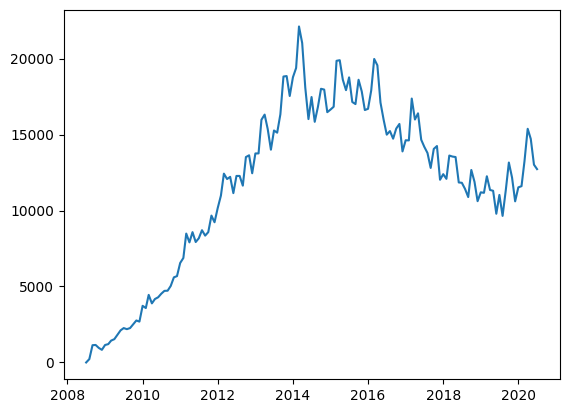

In [63]:
plt.plot(reshaped_df.index, reshaped_df["java"])

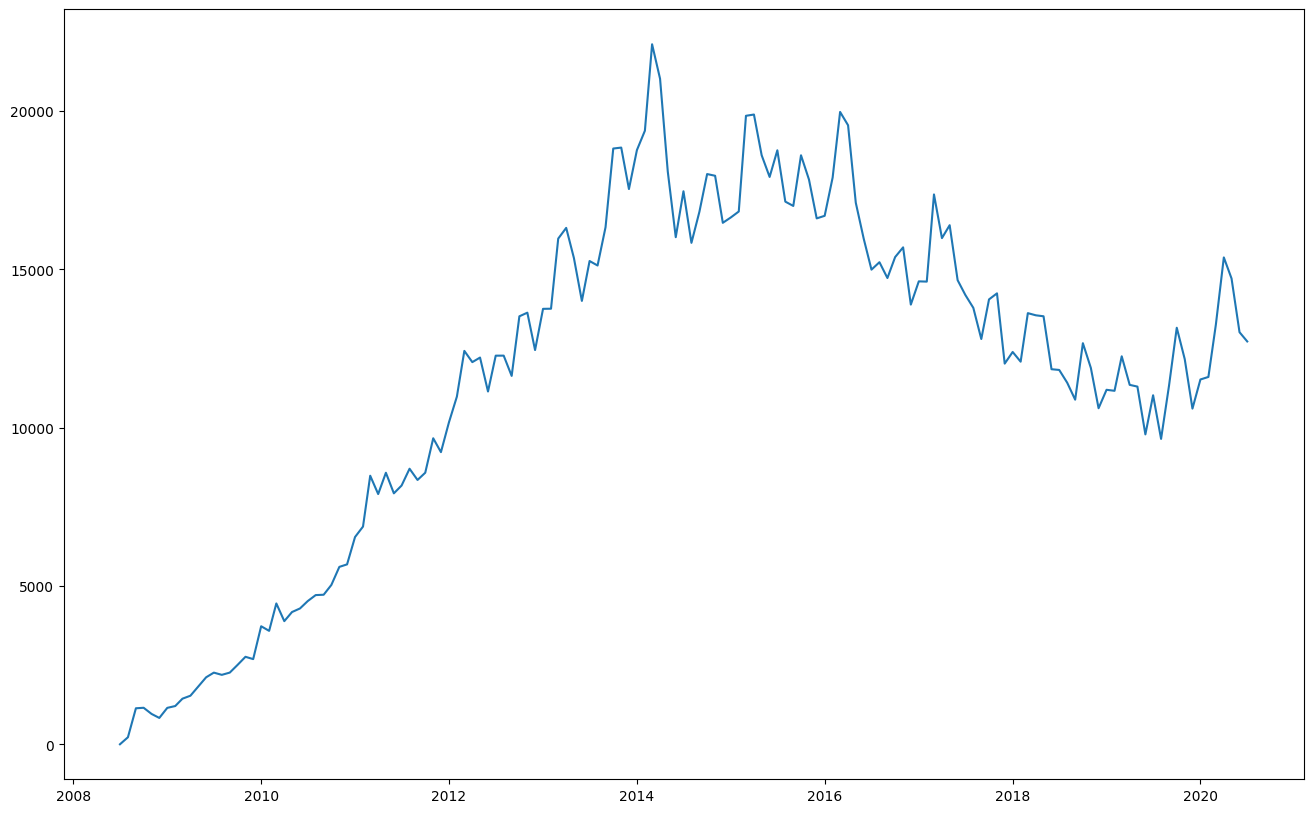

In [69]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df["java"])

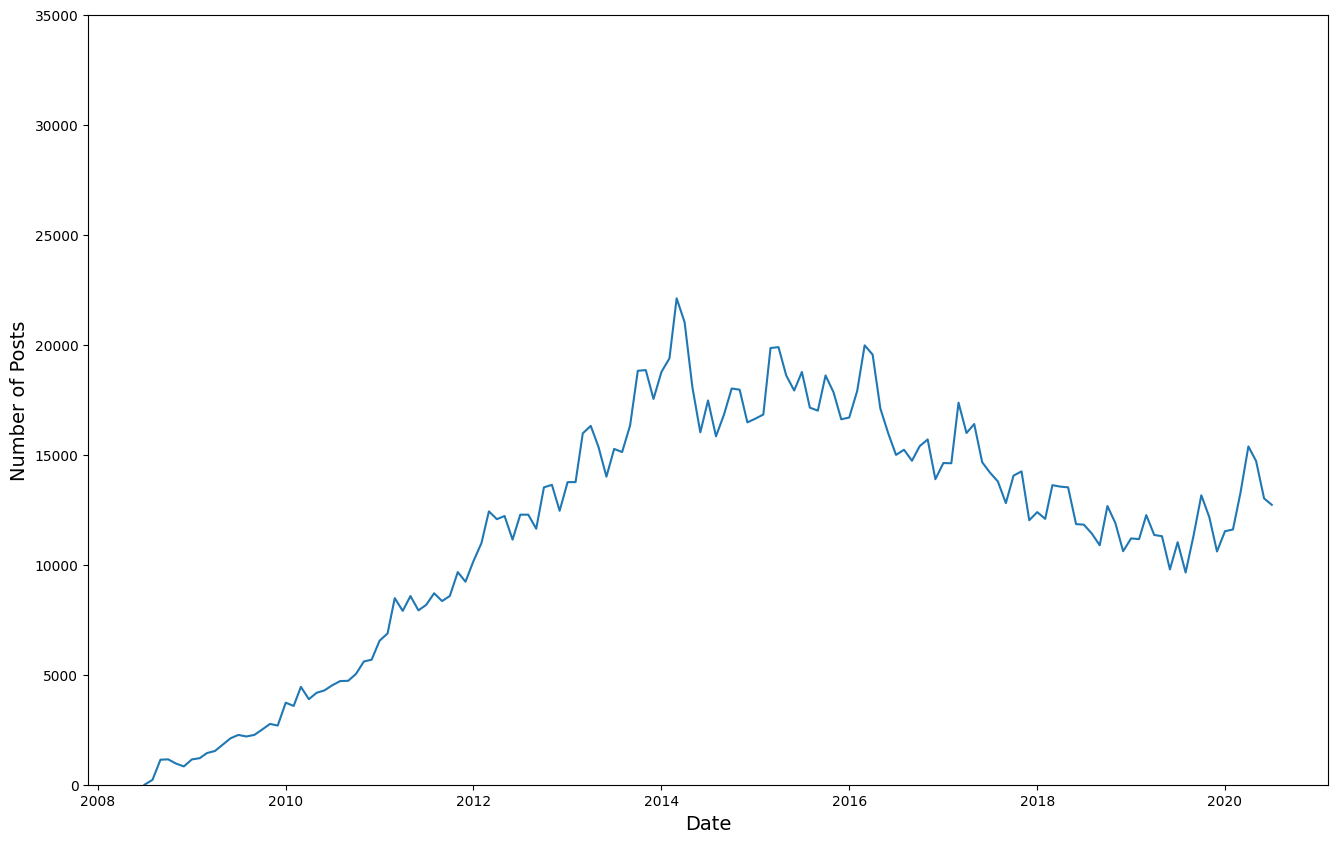

In [70]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

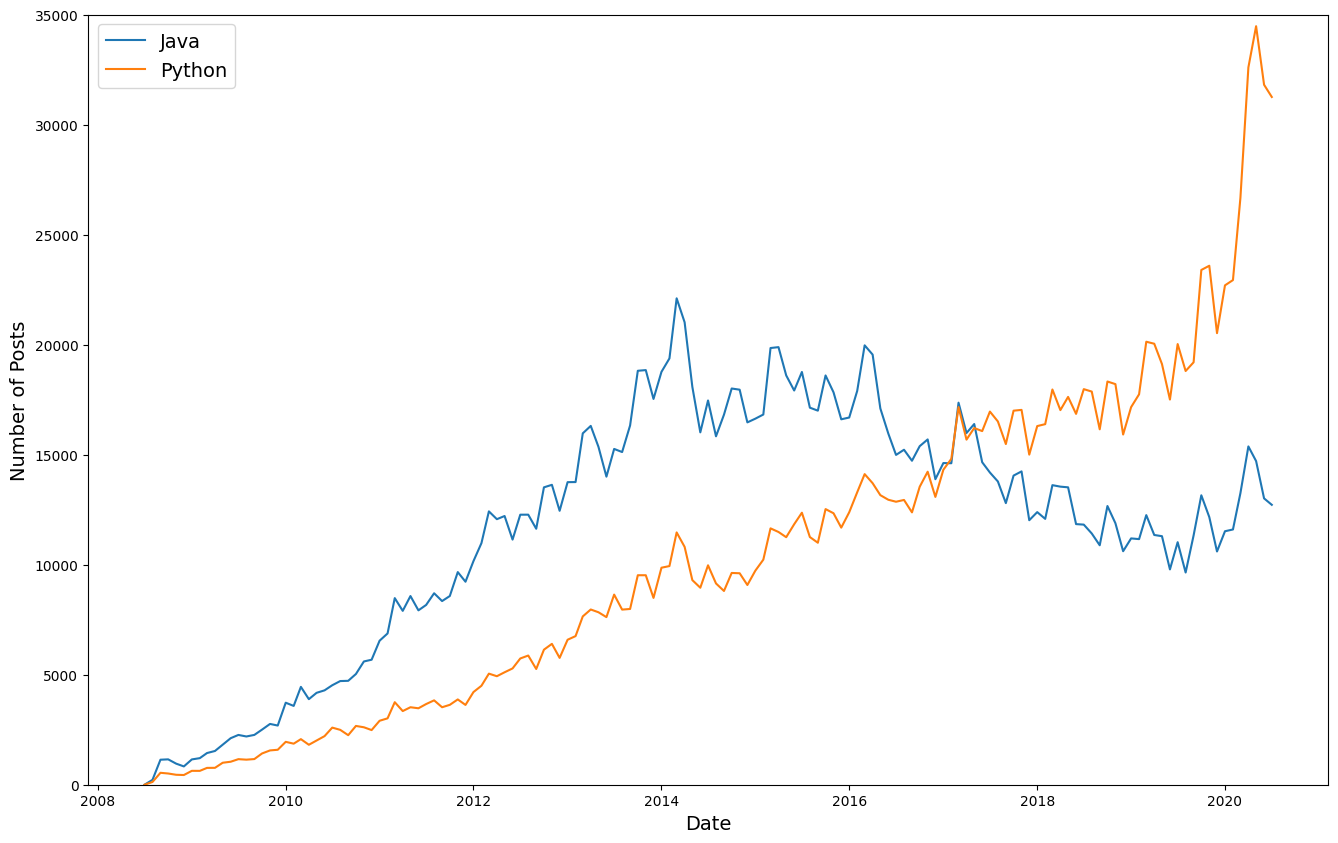

In [71]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"], label='Java')
plt.plot(reshaped_df.index, reshaped_df["python"], label='Python')
plt.legend(fontsize=14)
plt.show()

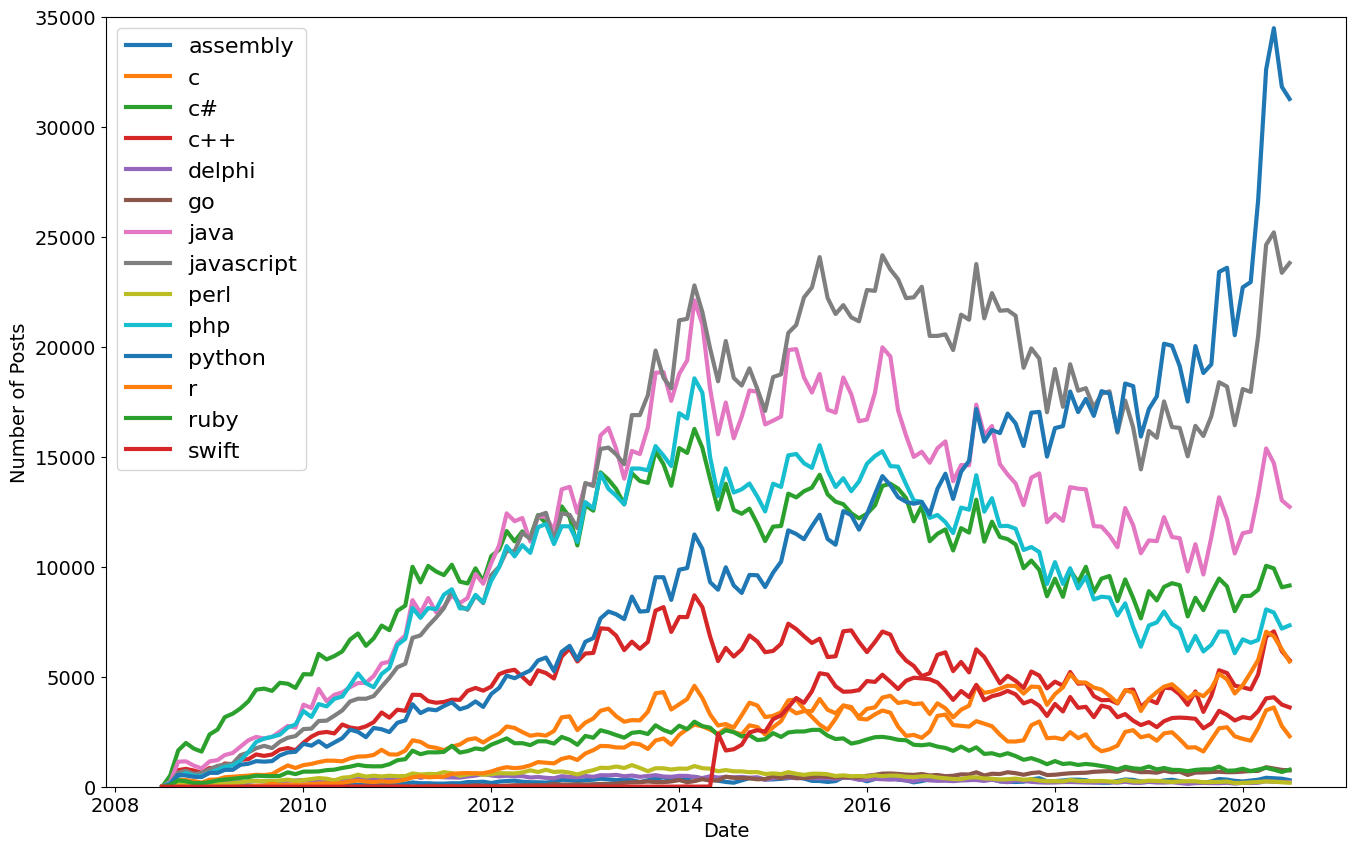

In [75]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

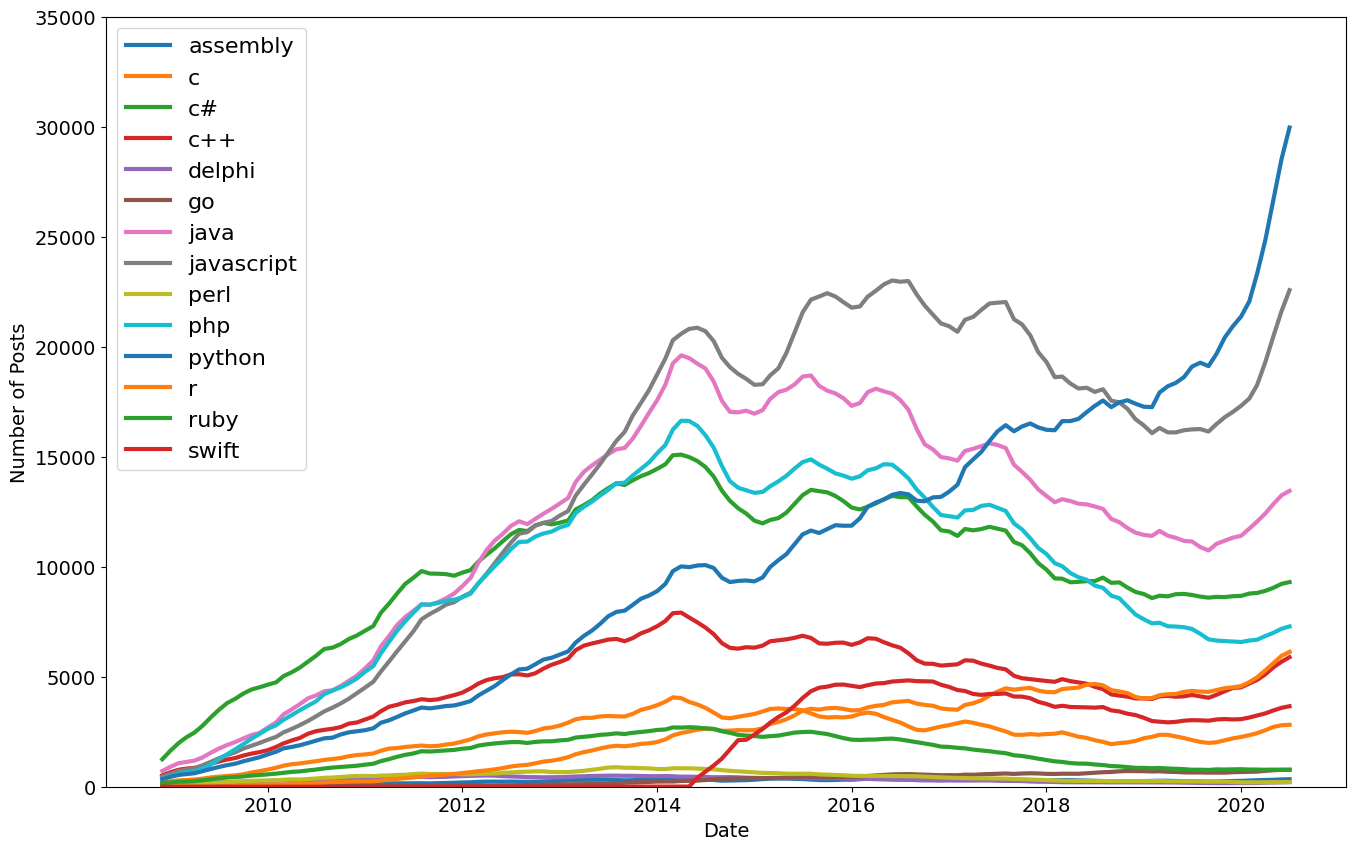

In [76]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

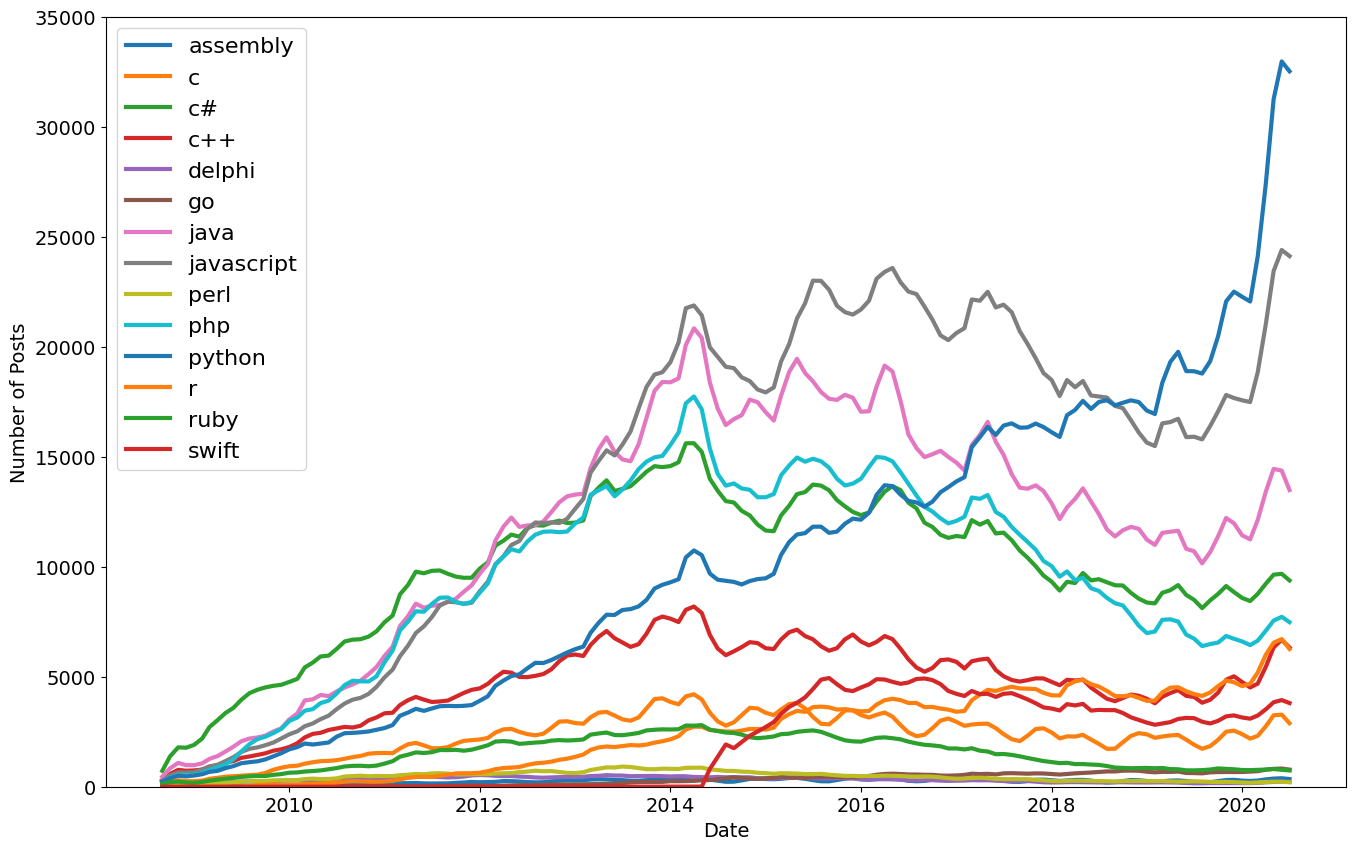

In [77]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=3).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

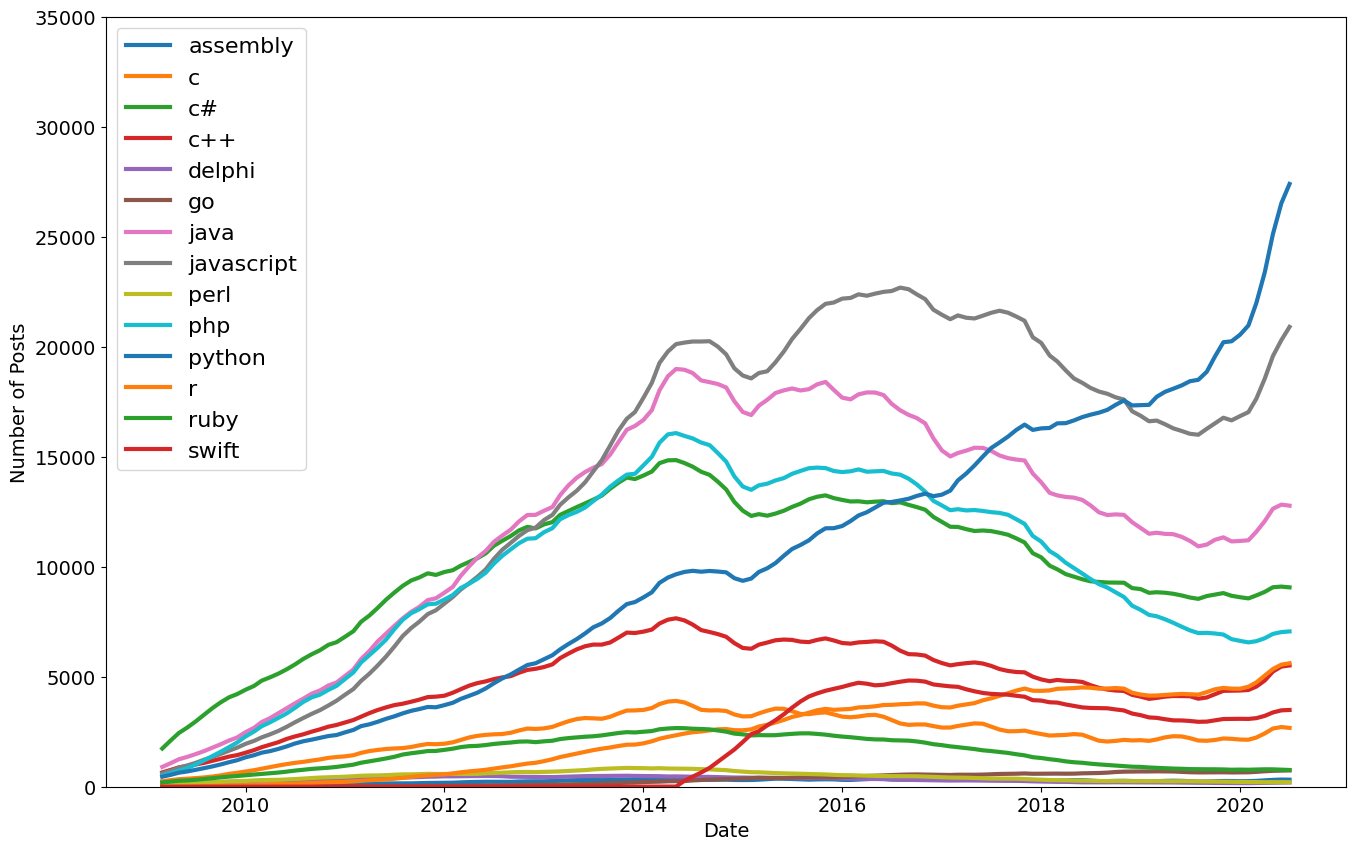

In [78]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=9).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

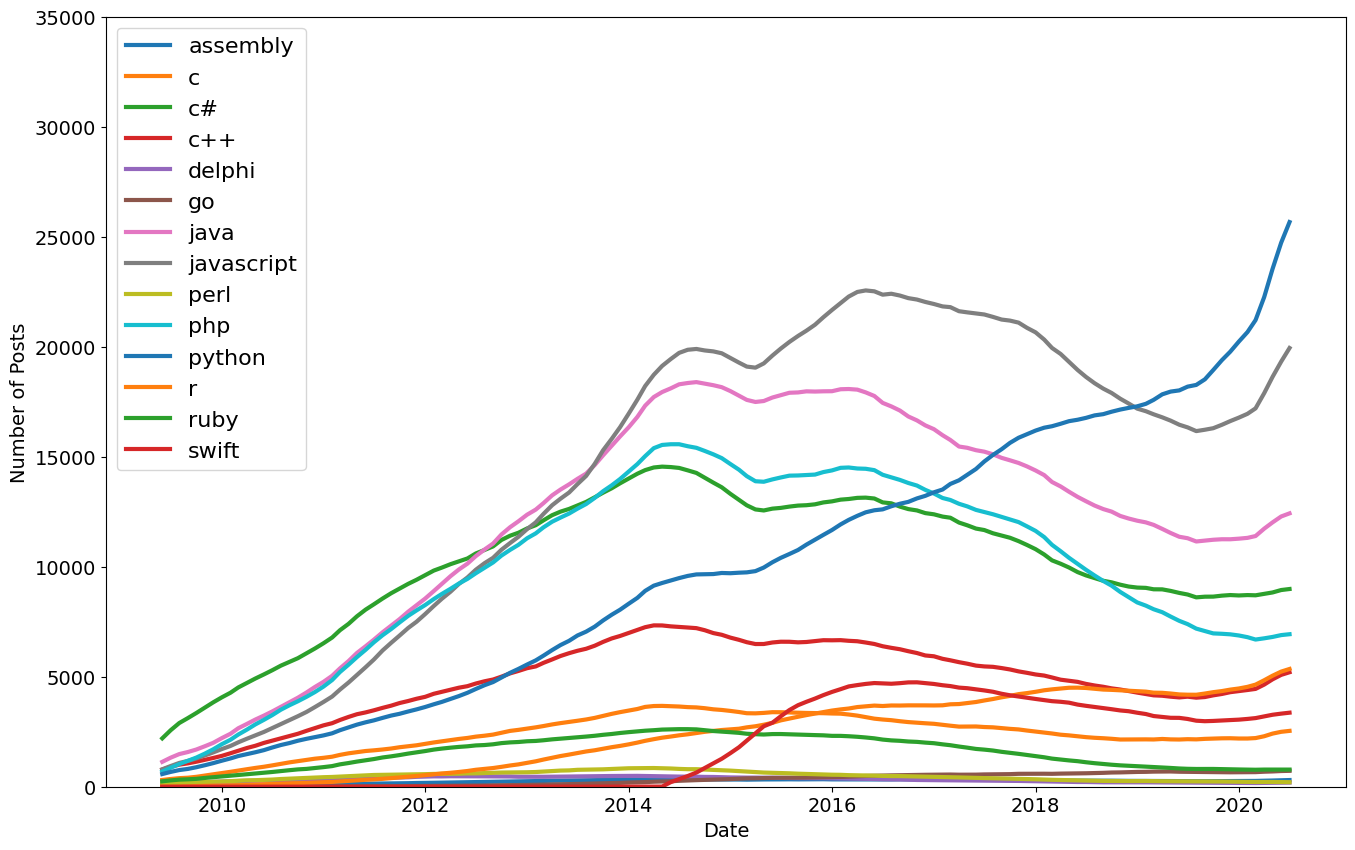

In [79]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)